In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_context('poster', font_scale=1.25)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from LB_D2Q9.dimensionless import opencl_dim as lb_cl

Let's setup the simulation parameters. See what our non-dimensional numbers are.

There is something wrong with the pressure gradient.

# Checking that refining resolution gives us the same result

In [5]:
D = 1. # meter
rho = 1. # kg/m^3
nu = 1. # Viscosity, m^2/s

pressure_grad = -10 # Pa/m

pipe_length = 3*D # meter

sim0 = lb_cl.Pipe_Flow(diameter=D, rho=rho, viscosity=nu, pressure_grad=pressure_grad, pipe_length=pipe_length,
                       N=25, time_prefactor=1.,
                       two_d_local_size = (32, 32), three_d_local_size = (32, 32, 1))

Characteristic L: 1.0
Characteristic T: 0.8
Reynolds number: 1.5625
omega 0.413223140496
2d global: (96, 32)
2d local: (32, 32)
3d global: (96, 32, 9)
3d local: (32, 32, 1)
The platforms detected are:
---------------------------
NVIDIA CUDA NVIDIA Corporation version: OpenCL 1.2 CUDA 7.5.23
The devices detected on platform NVIDIA CUDA are:
---------------------------
GeForce GTX TITAN Black [Type: GPU ]
Maximum clock Frequency: 980 MHz
Maximum allocable memory size: 1610 MB
Maximum work group size 1024
Maximum work item dimensions 3
Maximum work item size [1024, 1024, 64]
---------------------------
This context is associated with  1 devices
inlet rho: 1.0933888
outlet rho: 1.0


In [6]:
D = 1. # meter
rho = 1. # kg/m^3
nu = 1. # Viscosity, m^2/s

pressure_grad = -10 # Pa/m

pipe_length = 3*D # meter

sim1 = lb_cl.Pipe_Flow(diameter=D, rho=rho, viscosity=nu, pressure_grad=pressure_grad, pipe_length=pipe_length,
                       N=50, time_prefactor=1.,
                       two_d_local_size = (32, 32), three_d_local_size = (32, 32, 1))

Characteristic L: 1.0
Characteristic T: 0.8
Reynolds number: 1.5625
omega 0.413223140496
2d global: (160, 64)
2d local: (32, 32)
3d global: (160, 64, 9)
3d local: (32, 32, 1)
The platforms detected are:
---------------------------
NVIDIA CUDA NVIDIA Corporation version: OpenCL 1.2 CUDA 7.5.23
The devices detected on platform NVIDIA CUDA are:
---------------------------
GeForce GTX TITAN Black [Type: GPU ]
Maximum clock Frequency: 980 MHz
Maximum allocable memory size: 1610 MB
Maximum work group size 1024
Maximum work item dimensions 3
Maximum work item size [1024, 1024, 64]
---------------------------
This context is associated with  1 devices
inlet rho: 1.0231936
outlet rho: 1.0


In [7]:
D = 1. # meter
rho = 1. # kg/m^3
nu = 1. # Viscosity, m^2/s

pressure_grad = -10 # Pa/m

pipe_length = 3*D # meter

sim2 = lb_cl.Pipe_Flow(diameter=D, rho=rho, viscosity=nu, pressure_grad=pressure_grad, pipe_length=pipe_length,
                       N=150, time_prefactor=1.,
                       two_d_local_size = (32, 32), three_d_local_size = (32, 32, 1))

Characteristic L: 1.0
Characteristic T: 0.8
Reynolds number: 1.5625
omega 0.413223140496
2d global: (480, 160)
2d local: (32, 32)
3d global: (480, 160, 9)
3d local: (32, 32, 1)
The platforms detected are:
---------------------------
NVIDIA CUDA NVIDIA Corporation version: OpenCL 1.2 CUDA 7.5.23
The devices detected on platform NVIDIA CUDA are:
---------------------------
GeForce GTX TITAN Black [Type: GPU ]
Maximum clock Frequency: 980 MHz
Maximum allocable memory size: 1610 MB
Maximum work group size 1024
Maximum work item dimensions 3
Maximum work item size [1024, 1024, 64]
---------------------------
This context is associated with  1 devices
inlet rho: 1.00256568889
outlet rho: 1.0


In [8]:
time_to_run = 5 # dimensionless time
num_steps = int(time_to_run/sim0.delta_t)
print 'Running for', num_steps
sim0.run(num_steps)

Running for 3125


In [9]:
time_to_run = 5 # seconds

In [10]:
num_steps = int(time_to_run/sim1.delta_t)
print 'Running for', num_steps

Running for 12500


In [11]:
sim1.run(num_steps)

In [12]:
num_steps = int(time_to_run/sim2.delta_t)
print 'Running for', num_steps

Running for 112499


In [13]:
sim2.run(num_steps)

<matplotlib.colorbar.Colorbar instance at 0x7fbb90307ea8>

/home/bryan/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


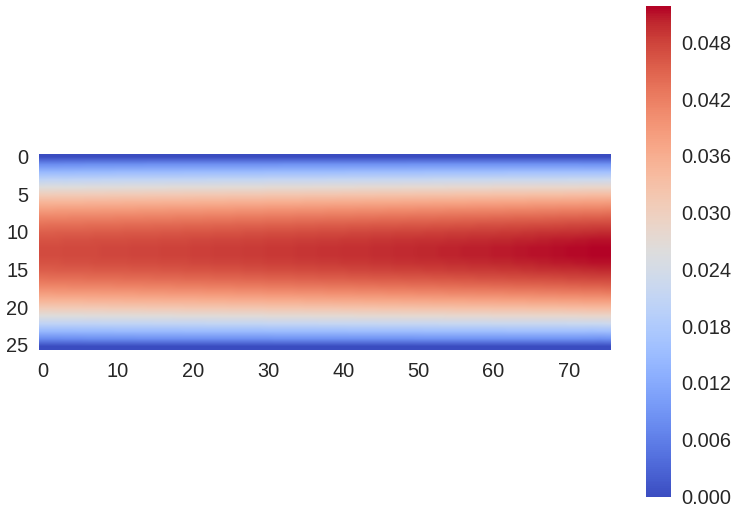

In [14]:
fields = sim0.get_fields()
plt.imshow(fields['u'].T, cmap=cm.coolwarm)
plt.grid(False)

plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fbb88737440>

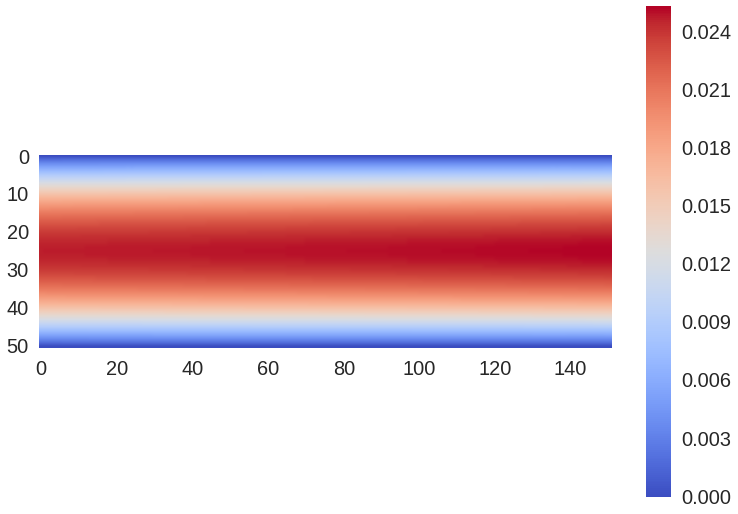

In [15]:
fields = sim1.get_fields()
plt.imshow(fields['u'].T, cmap=cm.coolwarm)
plt.grid(False)

plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fbb8859cfc8>

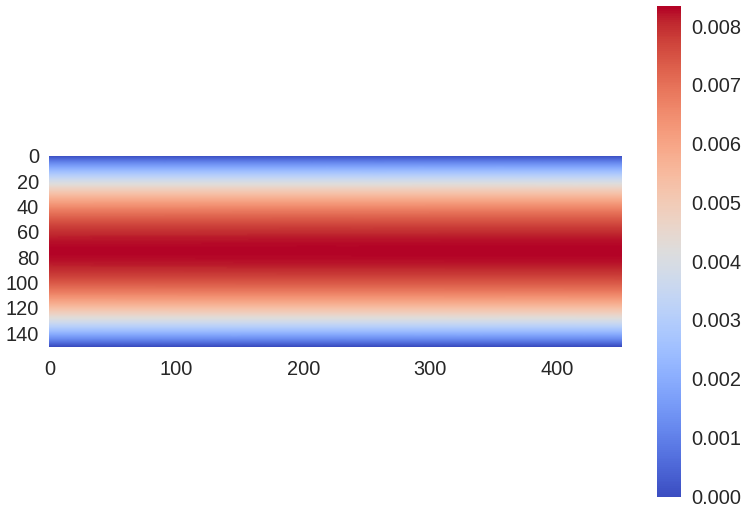

In [16]:
fields = sim2.get_fields()
plt.imshow(fields['u'].T, cmap=cm.coolwarm)
plt.grid(False)

plt.colorbar()

In [17]:
sns.set_style('ticks')

In [18]:
import matplotlib

In [19]:
matplotlib.rc('text', usetex=True)

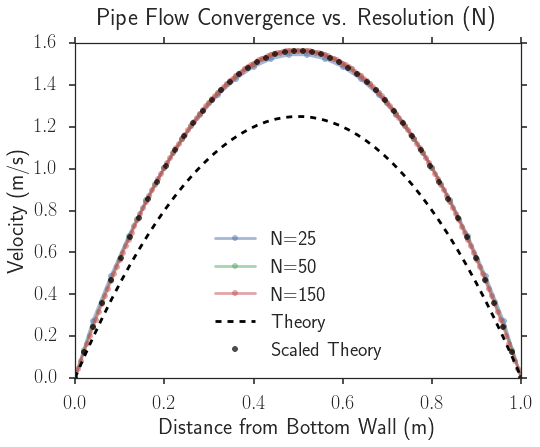

In [20]:
fields0 = sim0.get_physical_fields()
fields1 = sim1.get_physical_fields()
fields2 = sim2.get_physical_fields()

x_values = np.arange(fields0['u'].T.shape[0])*sim0.delta_x*sim0.L
# Get the mean velocity in the x direction
mean_u = fields0['u'].T.mean(axis=1)
plt.plot(x_values, mean_u, label='N=25', ls='-', marker='.', alpha=0.5)


x_values = np.arange(fields1['u'].T.shape[0])*sim1.delta_x*sim1.L
# Get the mean velocity in the x direction
mean_u = fields1['u'].T.mean(axis=1)
plt.plot(x_values, mean_u, label='N=50', ls='-', marker='.', alpha=0.5)

x_values = np.arange(fields2['u'].T.shape[0])*sim2.delta_x*sim2.L
mean_u = fields2['u'].T.mean(axis=1)
plt.plot(x_values, mean_u, label='N=150', ls='-', marker='.', alpha=0.5)

prefactor = (1./(2*rho*nu))*pressure_grad
y = np.linspace(0, D)

predicted = prefactor*y*(y-D)
# Convert non-dim predicted

plt.plot(y, predicted, label='Theory', color='Black', ls='--')

plt.plot(y, predicted*1.25, label='Scaled Theory', color='k', ls='', marker='.', alpha=0.7)

plt.xlabel('Distance from Bottom Wall (m)')
plt.ylabel('Velocity (m/s)')

plt.title('Pipe Flow Convergence vs. Resolution (N)', y=1.04)

plt.legend(loc='best')

plt.gcf().set_size_inches(8, 6)

plt.savefig('resolution_convergence_nonscaled.png', dpi=200, bbox_inches='tight')

Well, they are *extremely* close now. That's good at least.

Hm. They don't line up. IDK why. Weirdly, the pressure gradient does not work out. Why? Changing diameter does not mess things up.

WOW wtf lol

 So yes. The nondimensional fields are the same when we convert from simulation to simulation. *But*, they do not match our physical expectations...why.

Let's calculate the reynold's #'s of our simulation.

In [83]:
f1 = sim1.get_fields()

In [84]:
u_lb = np.max(np.abs(f1['u']))
N_lb = sim1.N
nu_lb = sim1.lb_viscosity

print (u_lb*N_lb)/nu_lb

1.95534105135


In [87]:
f2 = sim2.get_fields()

In [88]:
u_lb = np.max(f2['u'])
N_lb = sim2.N
nu_lb = sim2.lb_viscosity

print (u_lb*N_lb)/nu_lb

1.95655971766


Ok. The reynold's #'s are the same for the two, but are not what we expect analytically, so there is something wrong. Good, making progress!

Ok. As far as I can tell, the only issue is that the system is off by a constant factor. Probably dealing with density. Changing space is ok, i.e. the net result is the same. So we are in pretty good shape overall.